#**The Graduate Rotational Internship Program (GRIP - Feb 2024) organised by The Sparks Foundation.**

#Author: Lydia Touahri

#**Task-5 :Exploratory Data Analysis - Sports**


*   Perform Exploratory Data Analysis on dataset 'Indian Premier League'
*   Find out the most successful teams, players and factors contributing
    win or loss of a team. Also, Suggest teams or players a company should endorse for its products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [54]:

matches_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")

In [55]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [56]:
score_df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


 **DATA INFORMATION**

In [57]:

print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [58]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [59]:
matches_df.shape

(756, 18)

In [60]:
matches_df.size

13608

In [61]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [62]:
matches_df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [63]:
# Matches we have got in the dataset
print(matches_df['id'].max())

# Seasons we have got in the dataset
matches_df['season'].unique()



11415


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [64]:
print("City in which most matches have been won: ",matches_df['city'].value_counts().idxmax())
print("Team that has won most matches: ",matches_df['winner'].value_counts().idxmax())
print("Player who has been man of the match most times: ",matches_df['player_of_match'].value_counts().idxmax())
print("Most frequent Umpire 1: " ,matches_df['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,matches_df['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin




* We are going to replace the missing values with the above outputs for their respective columns  
*  Since most values are null in umpire 3 we will replace them by NA.











In [65]:
matches_df['city'].fillna(value='Mumbai', inplace=True)
matches_df['winner'].fillna(value='Mumbai Indians', inplace=True)
matches_df['player_of_match'].fillna(value='CH Gayle', inplace=True)
matches_df['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
matches_df['umpire2'].fillna(value='C Shamshuddin', inplace=True)
matches_df['umpire3'].fillna(value='NA', inplace=True)

In [66]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [67]:
matches_df.duplicated().sum()


0

# **Finding Successful Teams and Players**

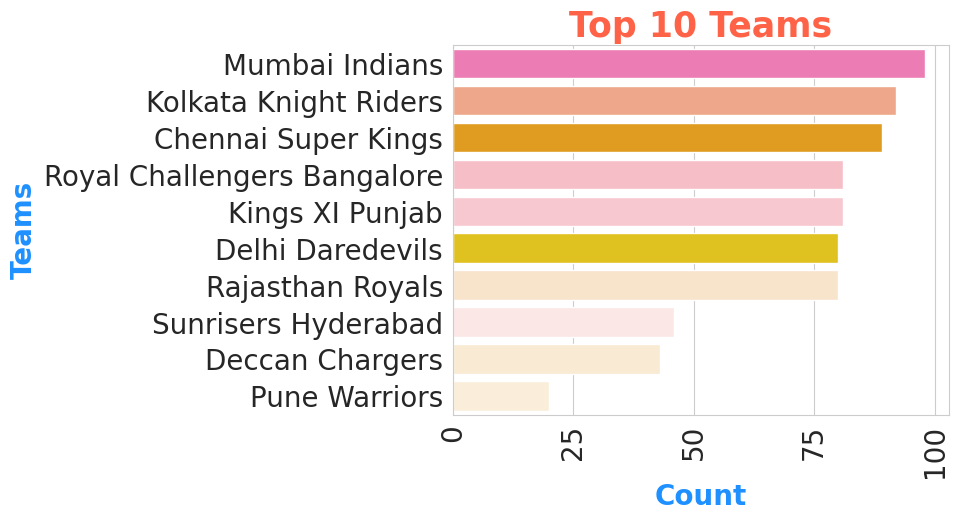

In [68]:
# Define your styles
style1  = {'color': 'Tomato', 'size': 25}
style2  = {'color': 'DodgerBlue', 'size': 20}

# Set the seaborn style
sns.set_style("whitegrid")

# Create the barplot
sns.barplot(y=matches_df['toss_winner'].value_counts()[:10].index,
            x=matches_df['toss_winner'].value_counts()[:10].values,
            palette=['#FF69B4', '#FFA07A', '#FFA500', '#FFB6C1', '#FFC0CB', '#FFD700', '#FFE4C4', '#FFE4E1', '#FFEBCD', '#FFEFD5'])

# Set the title, xlabel, and ylabel
plt.title('Top 10 Teams', fontdict=style1 )
plt.xlabel('Count' , fontdict=style2 )
plt.ylabel('Teams', fontdict=style2 )

# Rotate the xticks
plt.xticks(rotation=90)

# Show the plot
plt.show()

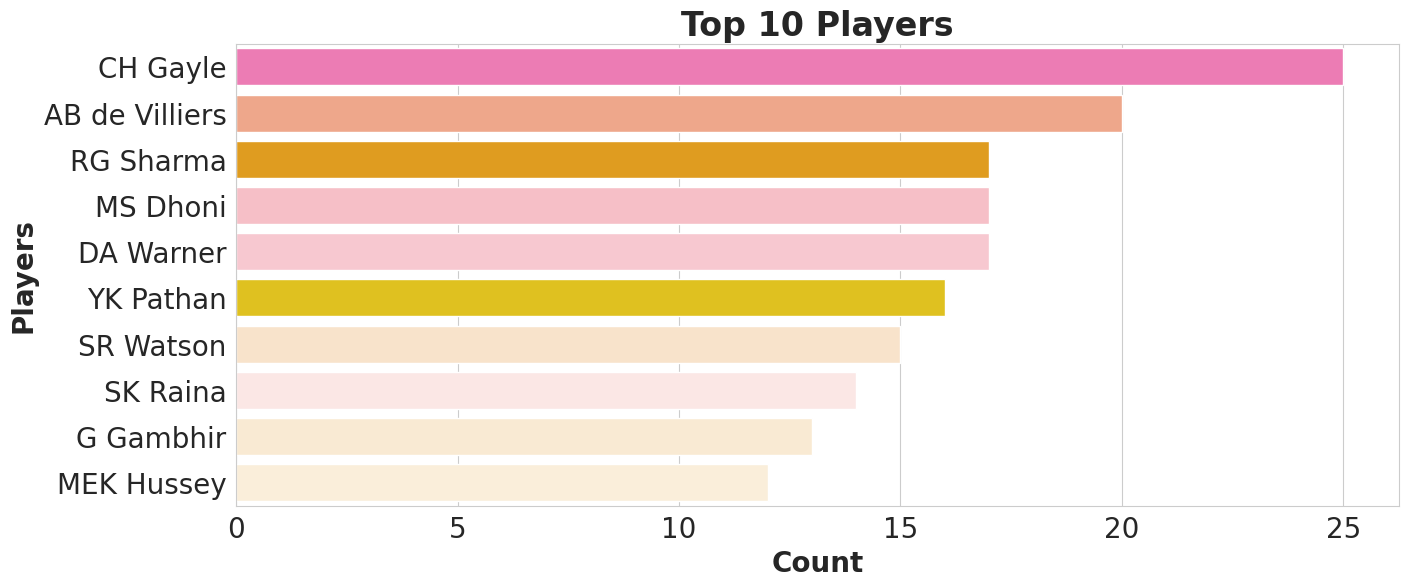

In [69]:
plt.subplots(figsize=(15,6))

# Set the seaborn style
sns.set_style("whitegrid")
sns.barplot(y=matches_df['player_of_match'].value_counts()[:10].index,
            x=matches_df['player_of_match'].value_counts()[:10].values,
            palette=['#FF69B4', '#FFA07A', '#FFA500', '#FFB6C1', '#FFC0CB', '#FFD700', '#FFE4C4', '#FFE4E1', '#FFEBCD', '#FFEFD5'])
plt.title('Top 10 Players' )
plt.xlabel('Count'  )
plt.ylabel('Players')
plt.show()

**Best Team is Mumbai Indians.**

**Best Player is CH Gayle.**


#**Finding the Factors Affecting the Victory**


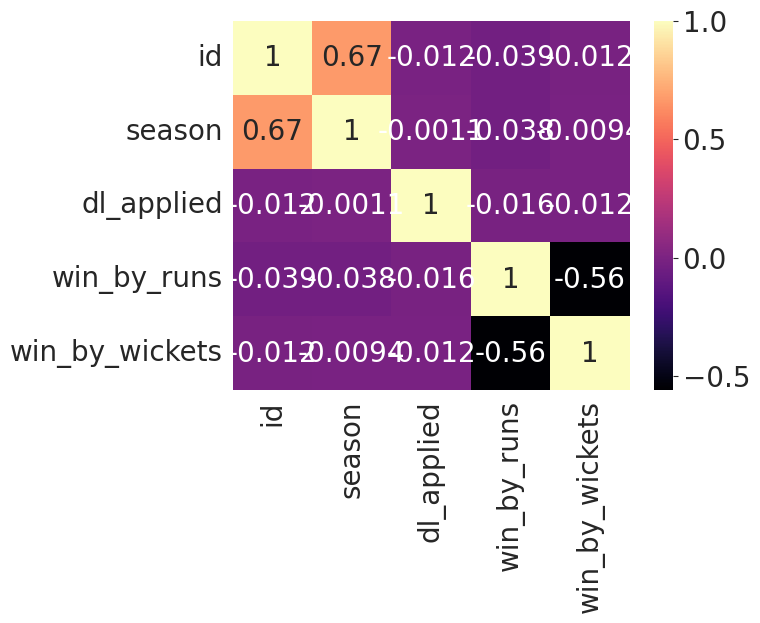

In [70]:
fac = sns.heatmap(matches_df.corr(), annot=True, cmap='magma')

In [71]:
matches_df = matches_df.drop(['dl_applied', 'season'], axis=1)

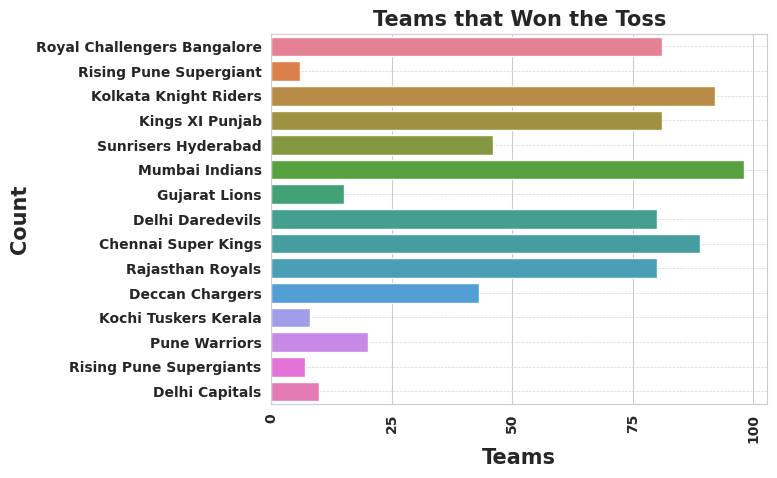

In [77]:
# Personnaliser les paramètres globaux de matplotlib
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Créer le graphique de comptage avec une palette de couleurs dynamique
sns.countplot(y='toss_winner', data=matches_df, palette='husl')

# Personnaliser les étiquettes et le titre
plt.xlabel('Teams', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.title('Teams that Won the Toss', fontweight="bold", size=15)

# Rotation des étiquettes x
plt.xticks(rotation=90, fontweight="bold", size=10)

# Personnaliser les étiquettes y
plt.yticks(fontweight="bold", size=10)



# Ajouter une grille de fond
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

# Afficher le graphique
plt.show()

In [78]:
print('Team that won most matches by Batting First: ',matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


In [79]:
print('Team that won most matches by Batting First: ',matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_runs.idxmax()]['winner'])

Team that won most matches by Batting First:  Rising Pune Supergiant


                 
                 Winning Toss and Batting first are a factor that affect the victory.

In [80]:
score_df.isnull().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [81]:
score_df.size

3760638

In [82]:
score_df = score_df.drop(['dismissal_kind','fielder'], axis=1)

In [83]:
score_df=pd.merge(score_df, matches_df, left_on='match_id', right_on='id')
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [84]:
print('Shape:', score_df.shape)
print('Size:', score_df.size)

Shape: (179078, 35)
Size: 6267730


In [85]:
score_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
dtype: int64

In [86]:
score_df.duplicated().sum()

23

In [87]:
score_df.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


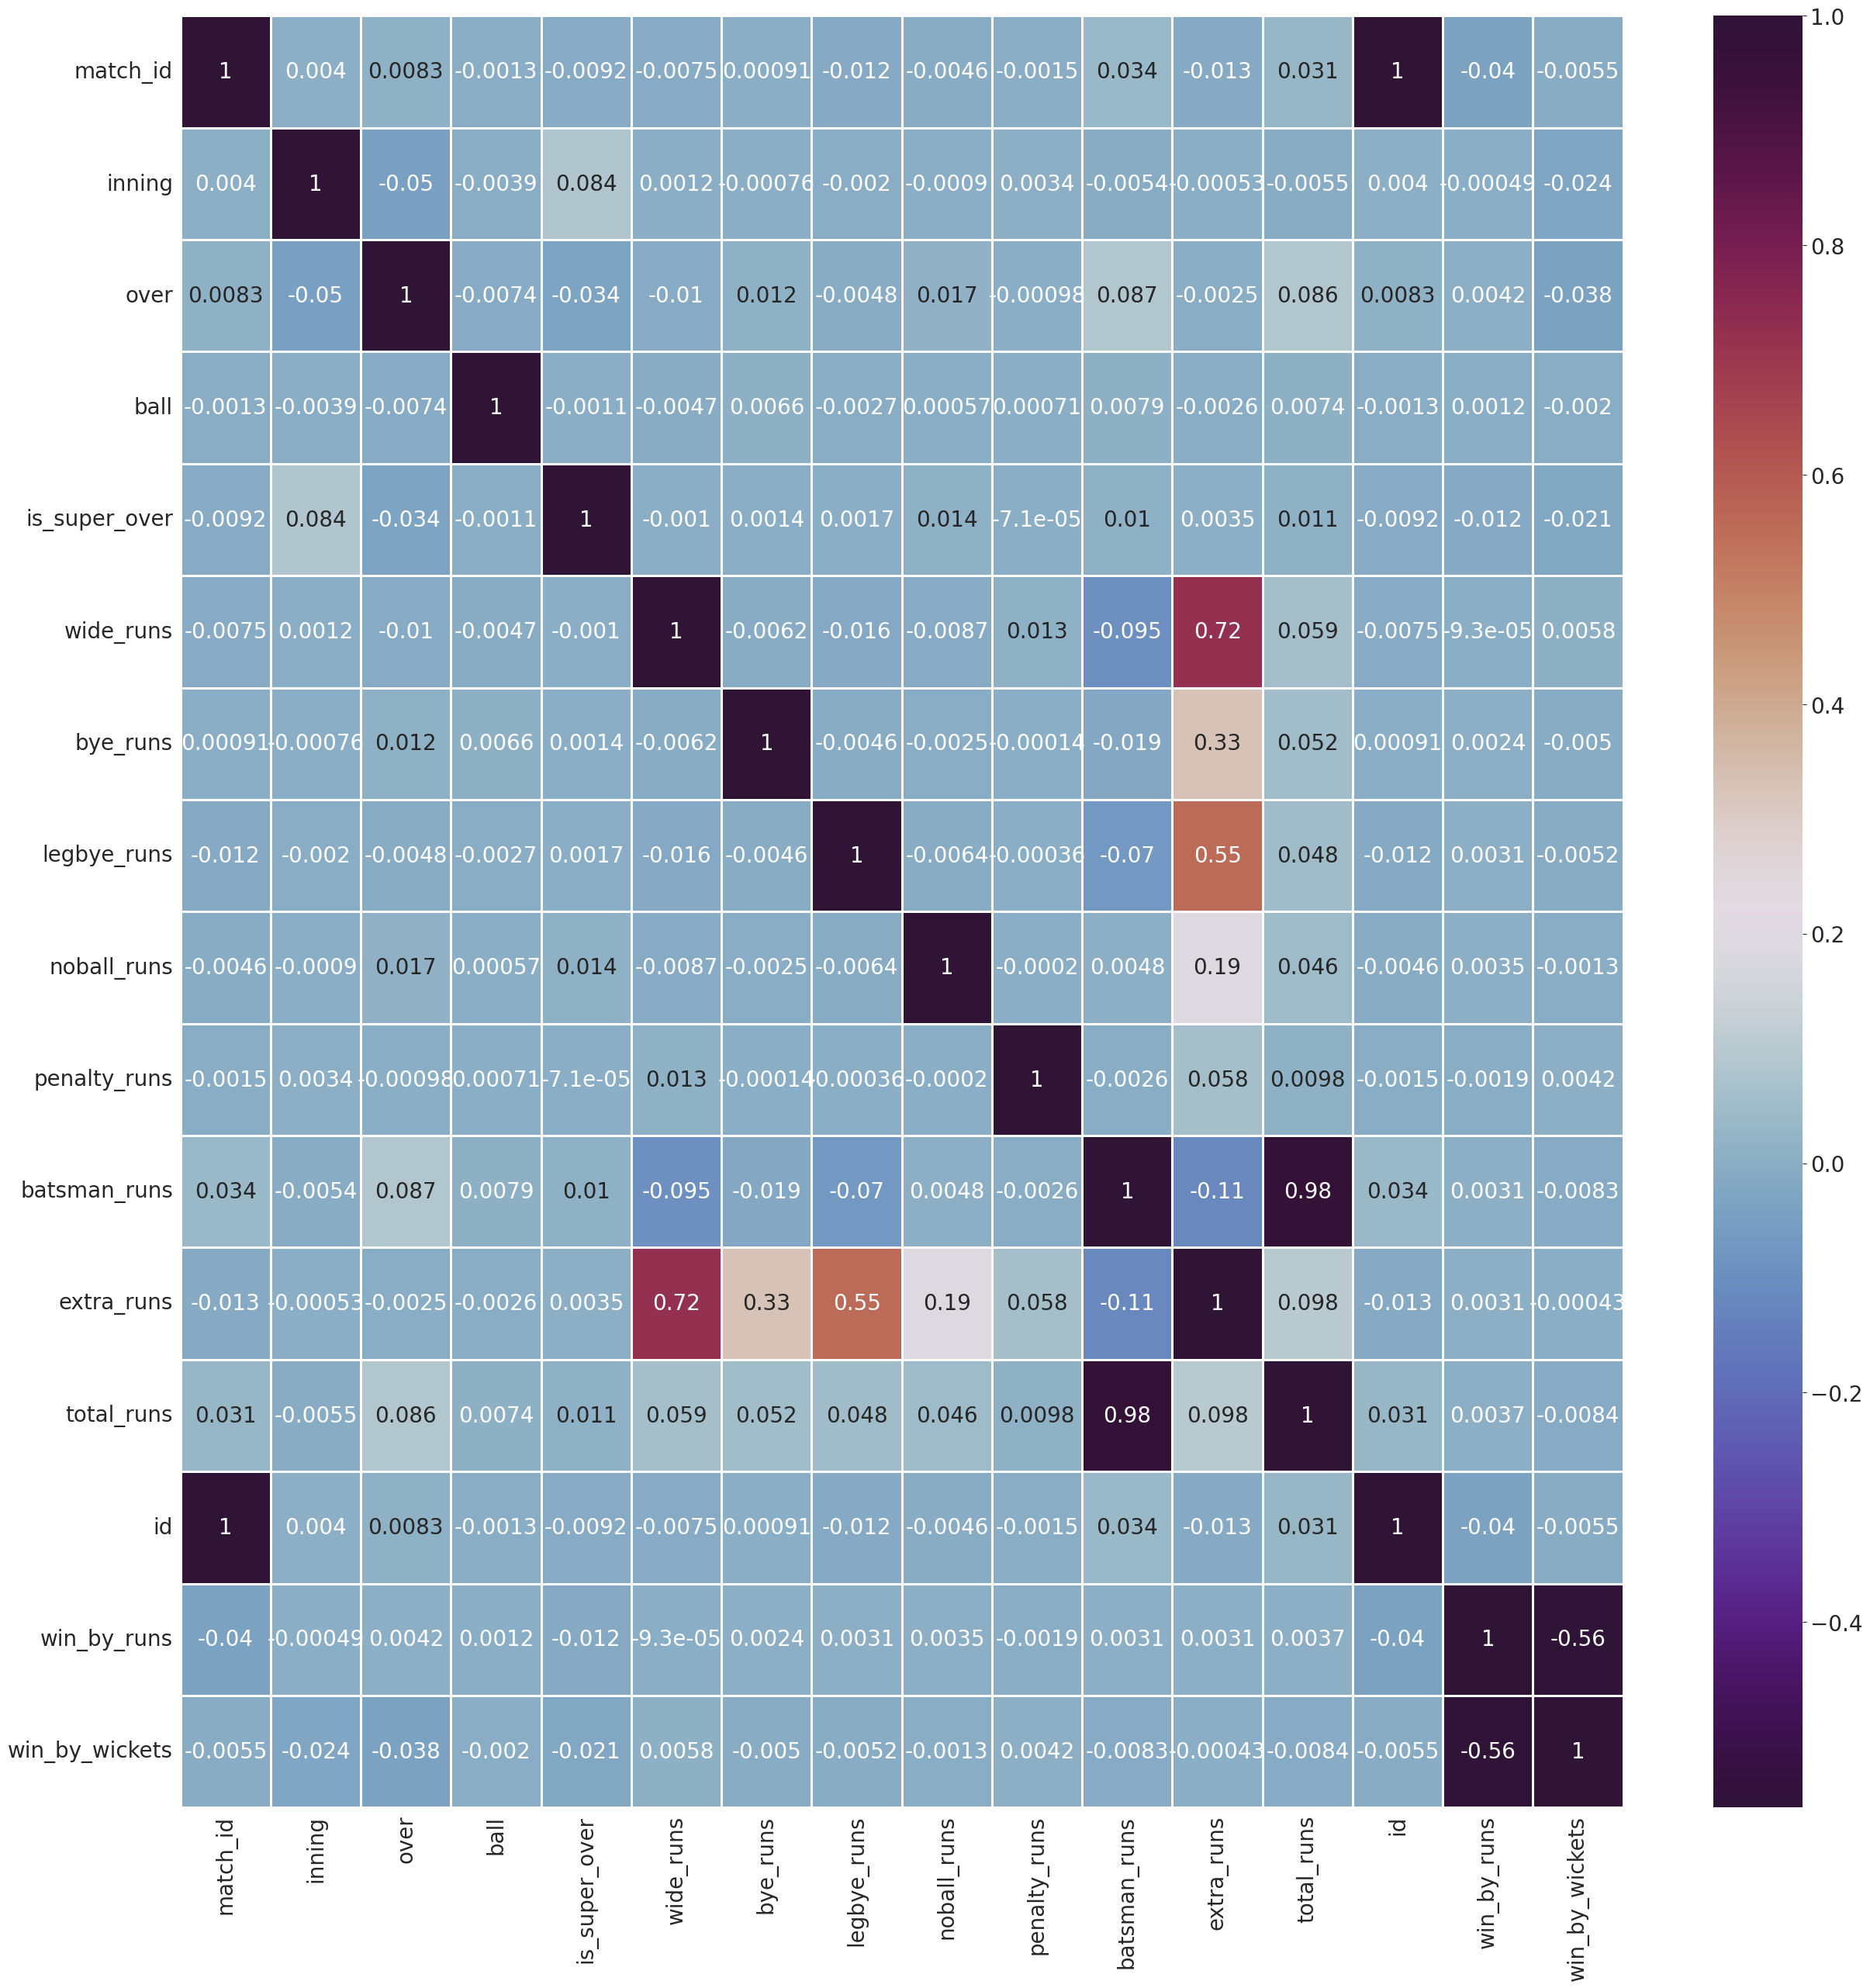

In [88]:
plt.figure(figsize=(30,30))
hm = sns.heatmap(score_df.corr(), annot=True, linewidth=2, cmap='twilight_shifted')

 **Number of Matches Played in Each**

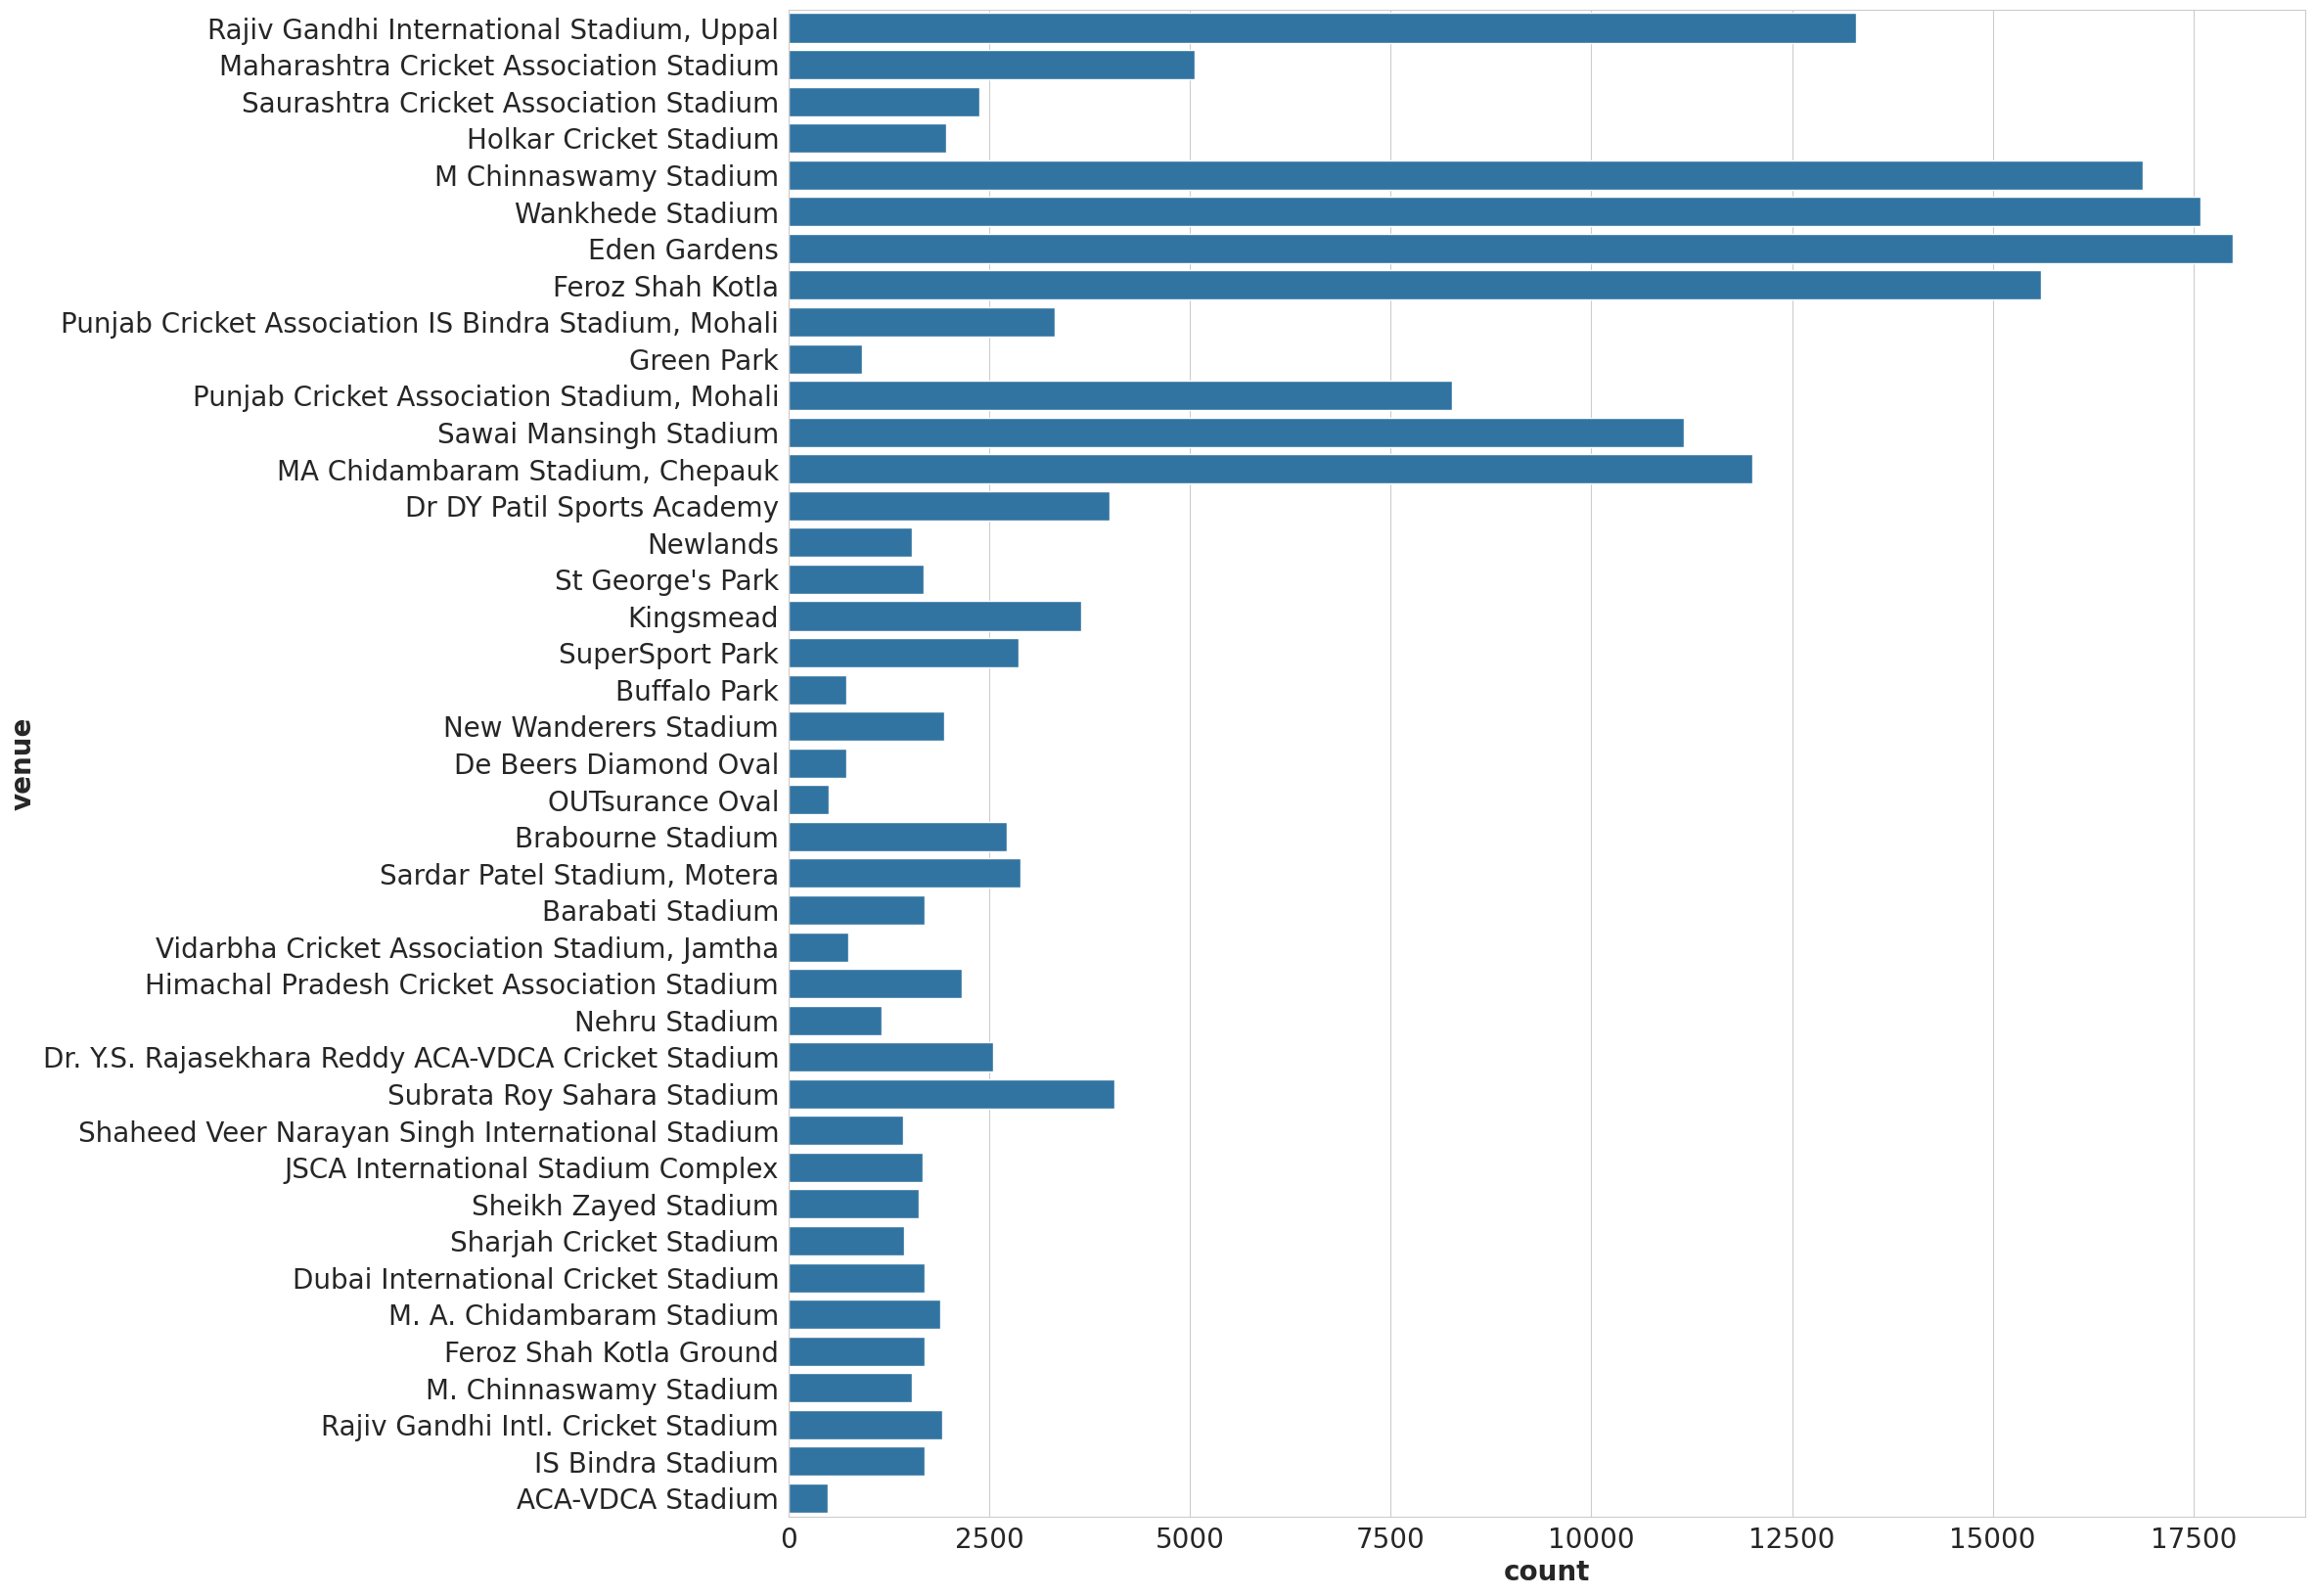

In [89]:
score_df.venue.value_counts()
plt.figure(figsize=(20,20))
sns.countplot(data=score_df, y='venue')
plt.show()

 **Relation between Winning toss and victory**

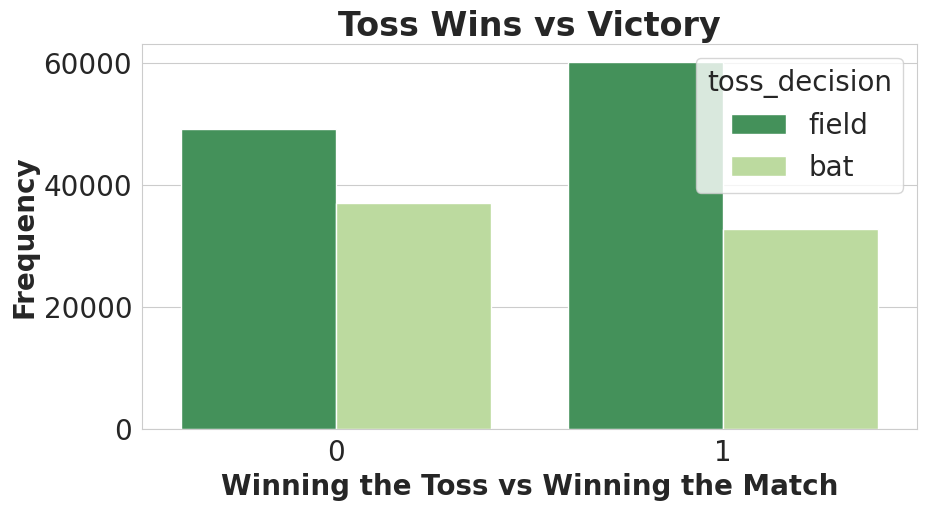

In [91]:
score_df['team_toss_win']=np.where((score_df.toss_winner==score_df.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot(x='team_toss_win', hue='toss_decision', palette='YlGn_r', data=score_df)
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")
plt.show()

**Top 5 Batsmen**

Text(0.5, 1.0, 'Top 5 Batsmen')

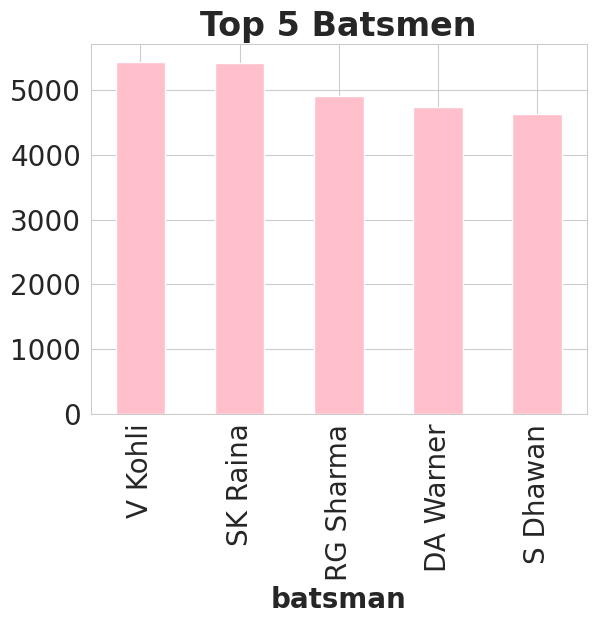

In [92]:

score_df.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='pink')
plt.title("Top 5 Batsmen")

             
             Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.

**Top 5 Bowlers**

Text(0.5, 1.0, 'Top 5 Bowlers')

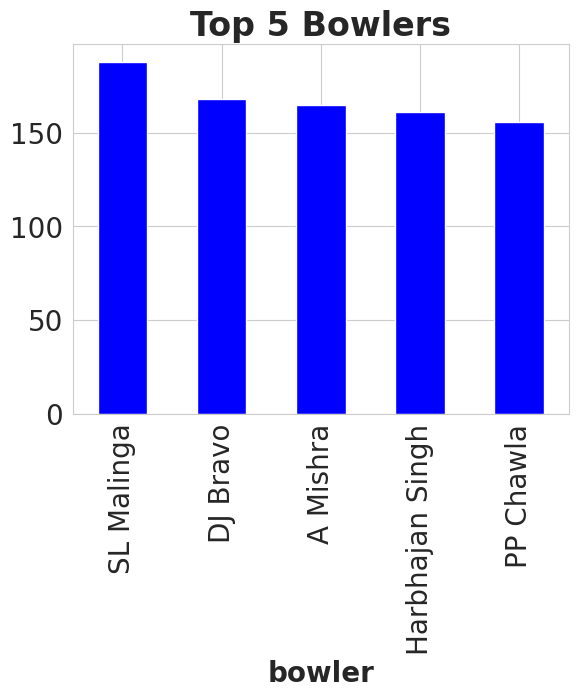

In [93]:
score_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='Blue')
plt.title("Top 5 Bowlers")

            
      SL Malinga took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets.